Ensemble Learning

We use ensemble learning in real life when in order to make a decision we ask opinions of different people.

To tackle the high variance problem we use ensemble learning.

In Ensemble learning, we train multiple models on the same dataset and then we make predictions of the multiple models and then we combine the predictions of multiple models somehow to get our final predicted answer. We do this because making predictions of one model can be biased.

Bagging and boosting are two techniques used in ensemble learning.

# Bagging

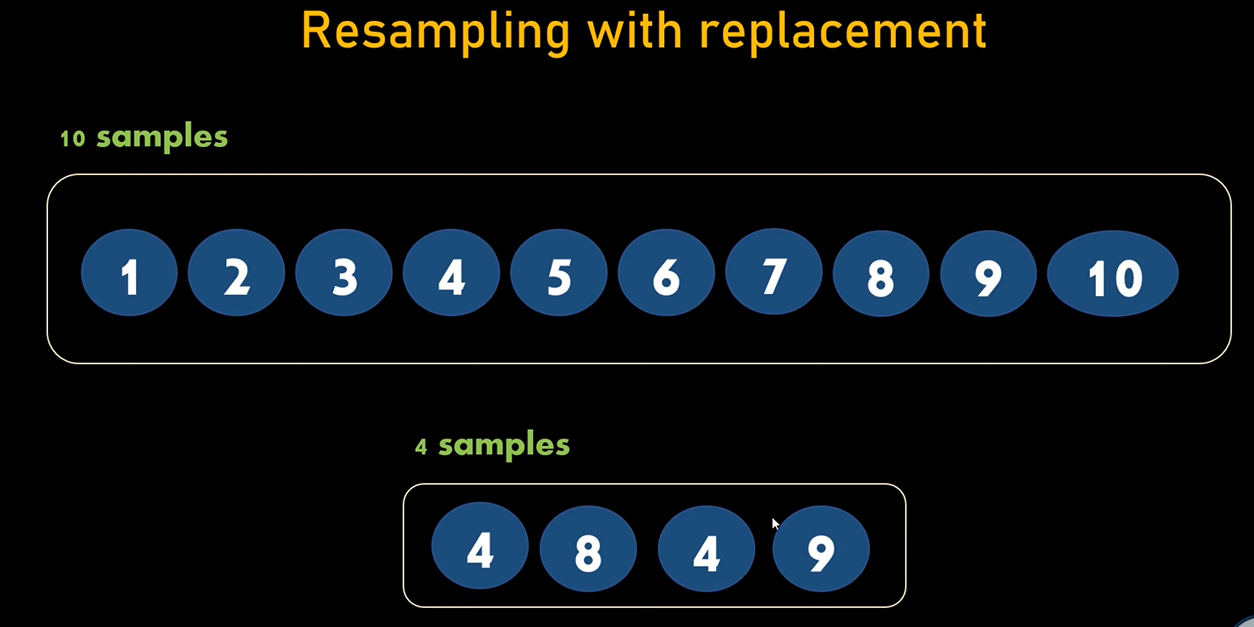

For Classification

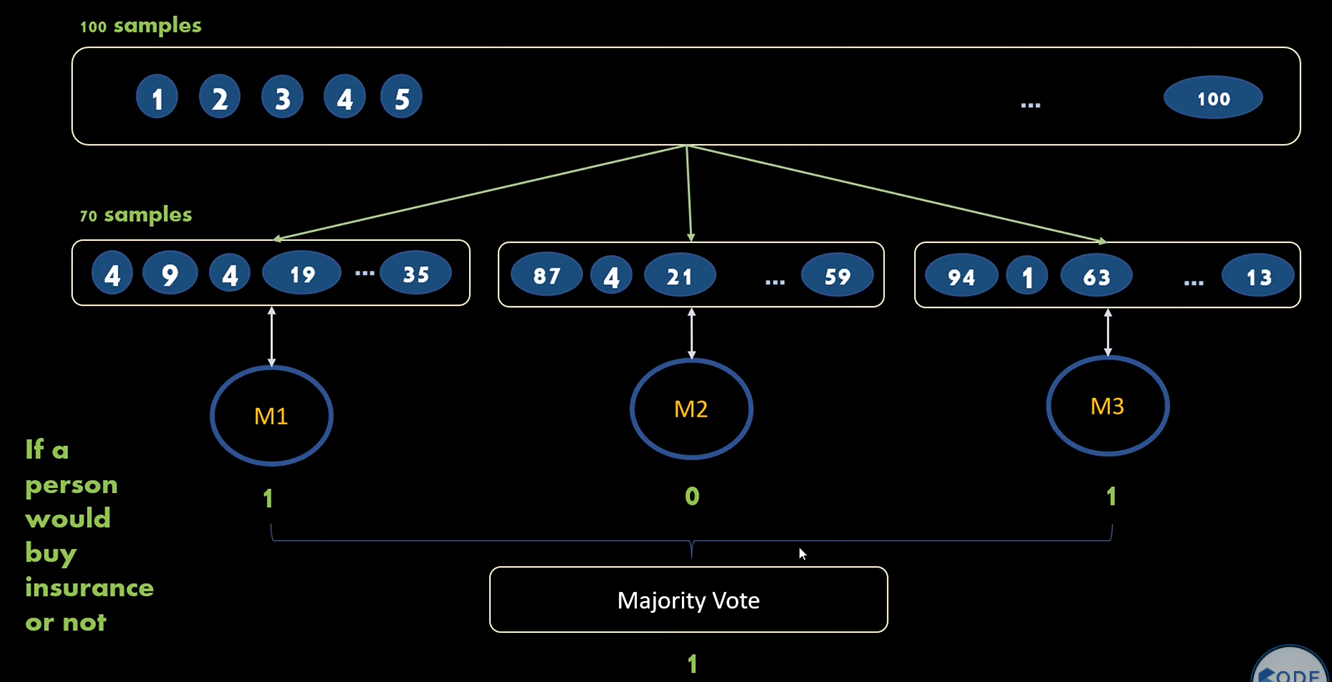

For Regression

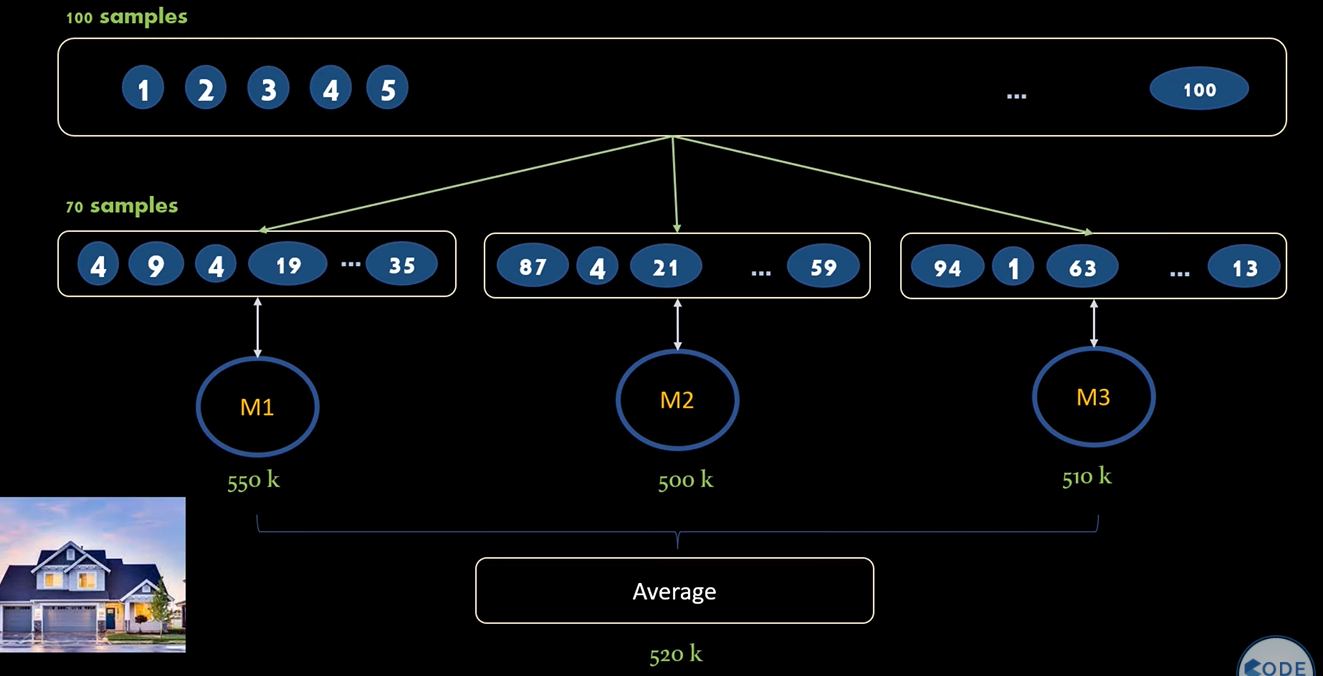

Bagging is also called Bootstrap and Aggregation

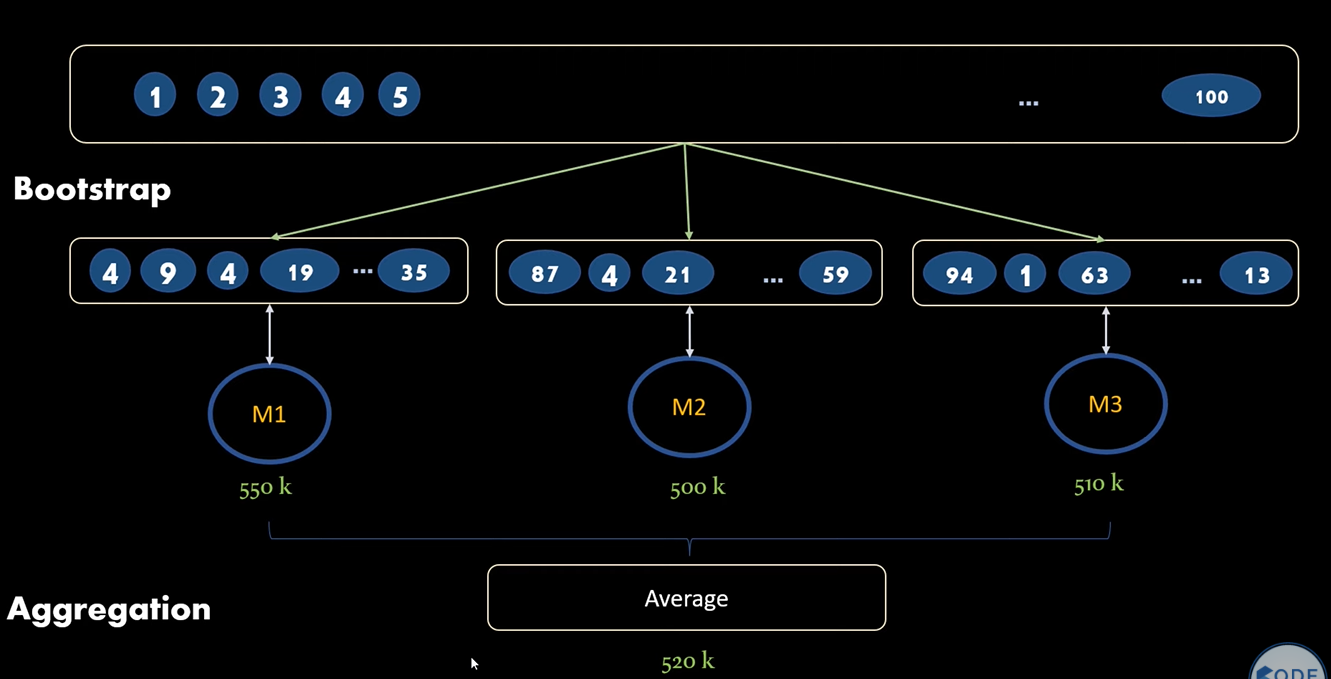

In Random Forest Algorithm, we not only resample the rows but we resample the columns as well, which means that we resample the features along with the datapoints.

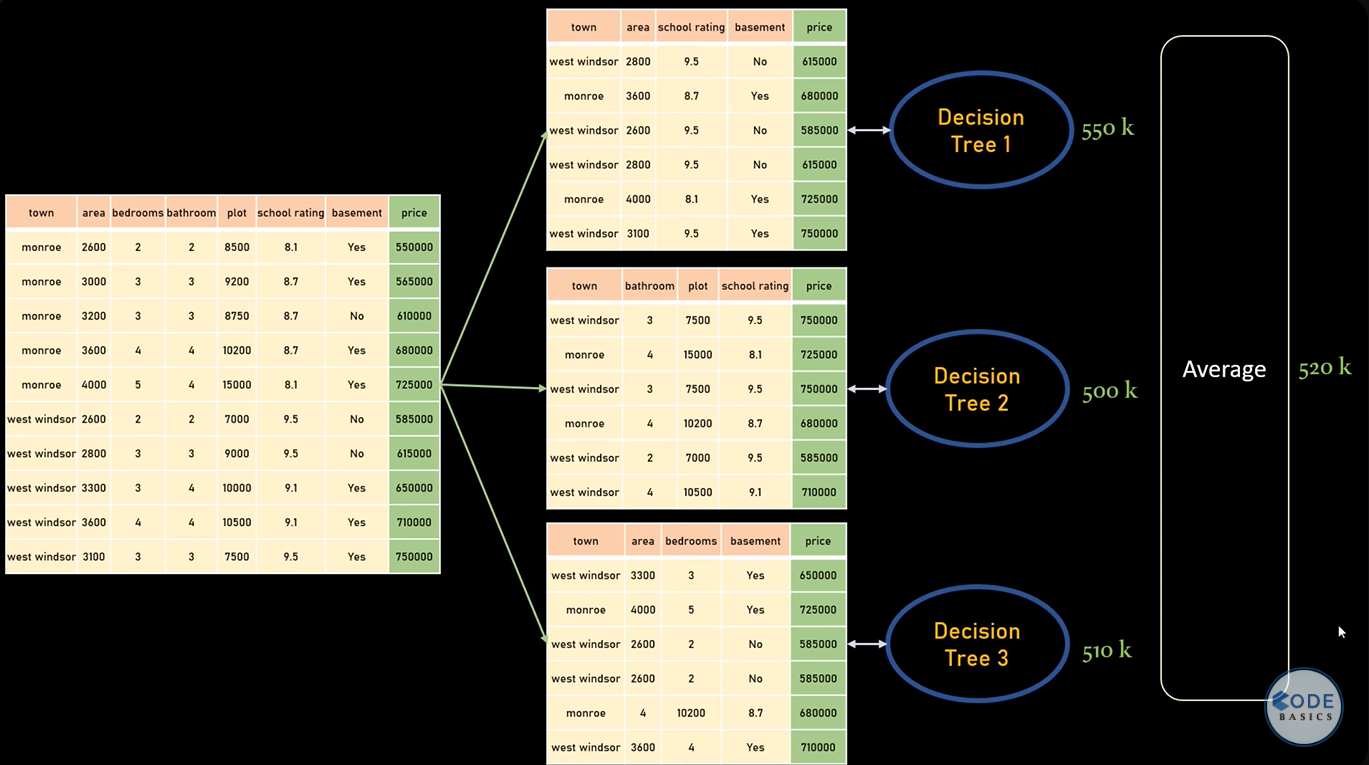

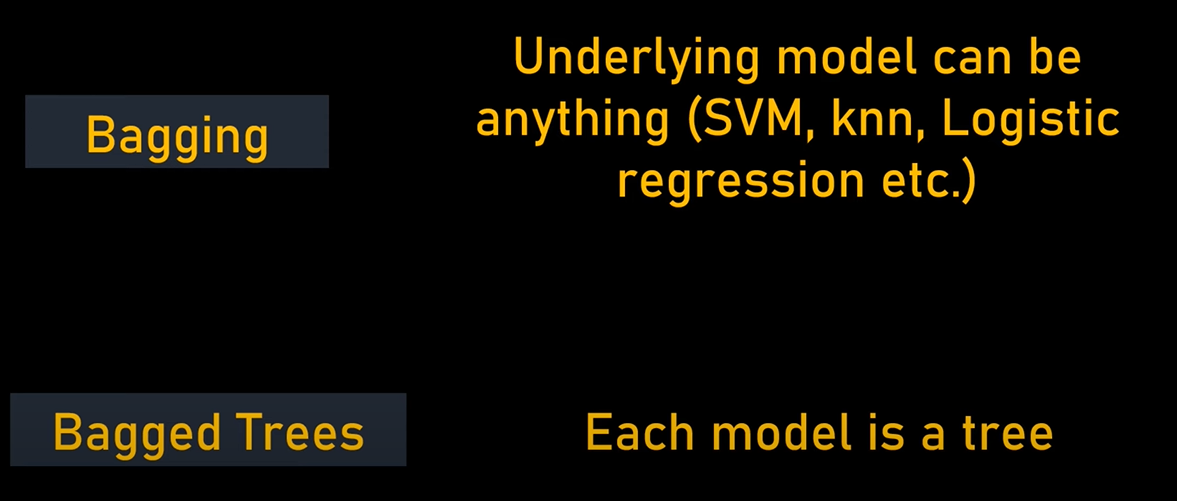

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [40]:
268/500

0.536

Train test split

In [41]:
X = df.drop('Outcome',axis='columns')
Y = df.Outcome

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,stratify=Y,random_state=10)

In [45]:
X_train.shape

(576, 8)

In [46]:
X_test.shape

(192, 8)

In [47]:
Y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [48]:
201/375

0.536

In [49]:
Y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [50]:
67/125

0.536

Train using stand alone model

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X_scaled, Y, cv=5)
scores

array([0.67532468, 0.68181818, 0.7012987 , 0.79738562, 0.7254902 ])

In [52]:
scores.mean()

0.7162634750870046

Train using Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, #100 resampling with replacement
    max_samples=0.8,  #each sample will have 80 datapoints.
    oob_score=True,   #due to the replacement nature, some of the datapoints are not included in any sample and they are used to predict the accuracy
    random_state=0
)
bag_model.fit(X_train, Y_train)
bag_model.oob_score_

0.7534722222222222

In [54]:
bag_model.score(X_test, Y_test)

0.7760416666666666

In [55]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X_scaled, Y, cv=5)
scores

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.74509804])

In [56]:
scores.mean()

0.7591800356506239

We can see some improvement in test score with bagging classifier as compared to a standalone classifier

Train using Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X_scaled, Y, cv=5)
scores.mean()

0.7656565656565657